$\newcommand{\TirName}[1]{\text{#1}}
\newcommand{\inferrule}[3][]{
  \let\and\qquad
  \begin{array}{@{}l@{}}
  \TirName{#1}
  \\
  \displaystyle
  \frac{#2}{#3}
  \end{array}
}
\newcommand{\infer}[3][]{\inferrule[#1]{#2}{#3}}
$

# Meeting 17 - Static Typing

Dakota Bryan  
Tuesday, October 22, 2024

<!-- 3 Expressions -->

<!-- 4 Binding and Scope -->

<!-- 8 Recursion -->

<!-- 9 Inductive Data Types -->

<!-- 11 Concrete Syntax -->

<!-- 12 Abstract Syntax and Parsing -->

<!-- 13 Exercise: Syntax -->

<!-- 14 Static Scoping -->

<!-- 15 Judgments -->

<!-- 16 Variables, Basic Values, and Judgments Lab -->

<!-- 18 Operational Semantics -->

<!-- 19 Functions and Dynamic Scoping -->

<!-- 20 Big-Step Exercise -->

<!-- 21 Evaluation Order  -->

<!-- Static Typing -->

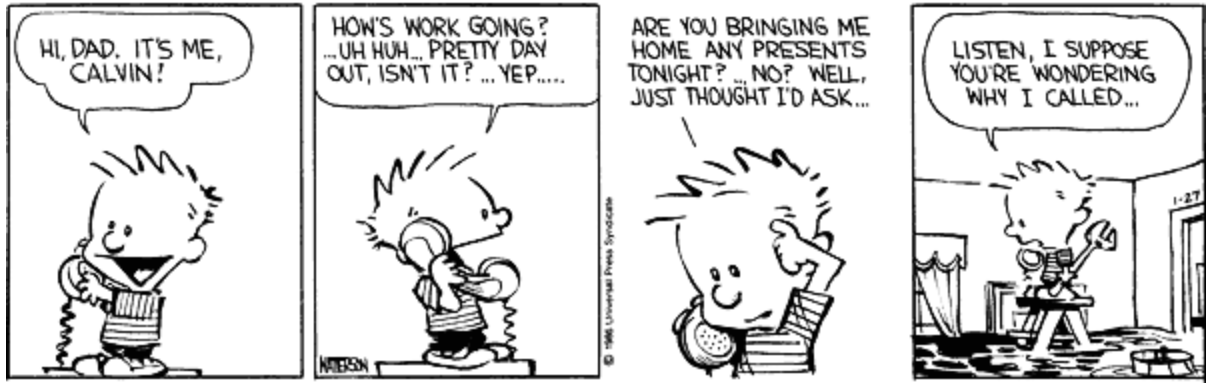

What questions does your neighbor have?

## Links

[ In-Class Slides](in-class/meeting17-static-typing.pdf)<br/> [ In-Class
Jupyter](in-class/meeting17-static-typing.ipynb)<br/> [ Book
Chapter](https://csci3155.cs.colorado.edu/pppl-course/book/static-typing.html)

## Announcements

-   Prof. Chang is delivering Thursday’s (10/24) lecture remotely, still
    come to class as it will be interactive

-   Lab 4 due Mon 10/28

## Today

-   Triage your questions

    -   Will do my best to answer all that I can

-   [Static
    Typing](https://csci3155.cs.colorado.edu/pppl-course/book/static-typing.html)

    -   Using a subset of JavaScripty, we will review abstract syntax,
        small-step semantics, and dynamic typing

    -   Using the same language, we will discuss static typing, typing
        rules, and implement a new language with a static type checker

# Static Typing

## Motivation

So far, we have handled mismatched types with coersions and dynamic type
errors

-   Both of these impelementations have painpoints, what are some for
    each?

Static typing checking alleviates these issues by handling type errors
prior to running the program

# JavaScripty with Numbers and Functions - Review

## Syntax

Syntax for JavaScripty with only anonymous functions, function calls,
and numbers:

$$
\begin{array}{rrrll}
\text{values} & v& \mathrel{::=}& n\mid\texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1
\\
\text{expressions} & e& \mathrel{::=}& n\mid\texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1
\mid x\mid e_1\texttt{(}e_2\texttt{)}
\\
\text{variables} & x
\end{array}
$$

## Semantics

Small-step semantics:

$\fbox{$e \longrightarrow e'$}$

$\inferrule[DoCall]{
}{
   (\texttt{(}x\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1) \texttt{(}v_2\texttt{)} \longrightarrow{}[v_2/x]e_1
}$

$\inferrule[SearchCall1]{
  e_1 \longrightarrow e_1'
}{
  e_1\texttt{(}e_2\texttt{)} \longrightarrow e_1'\texttt{(}e_2\texttt{)}
}$

$\inferrule[SearchCall2]{
  e_2 \longrightarrow e_2'
}{
   v_1 \texttt{(}e_2\texttt{)} \longrightarrow v_1 \texttt{(}e_2'\texttt{)}
}$

Why do we need the substitute?

## Implementation

$$
e_{\text{illtyped}} \colon\quad
\texttt{3}\texttt{(}\texttt{4}\texttt{)}
$$ How does our semantics handle the above?

## Dynamic Type Errors - Syntax and Semantics

Recall, we fixed the above issue by implementing dynamic type errors

$$
\begin{array}{rrrl}
\text{step-results} & r& \mathrel{::=}& \mathop{\mathsf{typeerror}}e \mid e'
\end{array}
$$

$\fbox{$e \longrightarrow r$}$

$\inferrule[TypeErrorCall]{
  v_1 \neq x^{?}\texttt{(}y\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1
}{
  v_1\texttt{(}e_2\texttt{)} \longrightarrow \mathop{\mathsf{typeerror}} (v_1\texttt{(}e_2\texttt{)})  
}$

$\inferrule[PropagateCall1]{
  e_1 \longrightarrow \mathop{\mathsf{typeerror}}e 
}{
  e_1\texttt{(}e_2\texttt{)} \longrightarrow \mathop{\mathsf{typeerror}}e 
}$

$\inferrule[PropagateCall2]{
  e_2 \longrightarrow \mathop{\mathsf{typeerror}}e 
}{
   v_1\texttt{(}e_2\texttt{)}  \longrightarrow \mathop{\mathsf{typeerror}}e 
}$

## Implementation

# Static Typing

-   Some expressions are “well-typed” and some expressions are
    “ill-typed”

$$
e_{\text{1}} \colon\quad \texttt{(}\texttt{(}\texttt{i}\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} \texttt{i}\texttt{)}\texttt{(}\texttt{4}\texttt{)}
\qquad\qquad\qquad
e_{\text{2}} \colon\quad \texttt{3}\texttt{(}\texttt{4}\texttt{)}
$$

-   Which one is ill-typed? Why?

-   What is a type?

-   A *type system* is a language of types and typing judgments that
    define when an expression has a particular type

$$
e : \tau
$$

## TypeScripty

Let’s modify our language to allow us to type check before
interpretation, and impelement typing rules that can infer the types of
expressions

-   What are the types of this language?

## TypeScripty Syntax

$$
\begin{array}{rrrl}
  \text{types} & \tau, t& \mathrel{::=}& \texttt{number}\mid\texttt{(}x\texttt{:}\,\tau\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} \tau'
  \\
  \text{values} & v& \mathrel{::=}& n\mid\texttt{(}x\texttt{:}\,\tau\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1
  \\
  \text{expressions} & e& \mathrel{::=}& n\mid\texttt{(}x\texttt{:}\,\tau\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1
  \mid x\mid e_1\texttt{(}e_2\texttt{)}
\end{array}
$$

-   This is very similar to the abstract syntax of JavaScripty

-   All possible types of values have their own types

## TypeScripty Small-Step Operational Semantics

$\fbox{$e \longrightarrow e'$}$

$\inferrule[DoCall]{
}{
   (\texttt{(}x\texttt{:}\,\tau\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1) \texttt{(}v_2\texttt{)} \longrightarrow{}[v_2/x]e_1
}$

$\inferrule[SearchCall1]{
  e_1 \longrightarrow e_1'
}{
  e_1\texttt{(}e_2\texttt{)} \longrightarrow e_1'\texttt{(}e_2\texttt{)}
}$

$\inferrule[SearchCall2]{
  e_2 \longrightarrow e_2'
}{
   v_1 \texttt{(}e_2\texttt{)} \longrightarrow v_1 \texttt{(}e_2'\texttt{)}
}$

-   Remains largely unchanged

-   We use the simplier version (without dynamic typing or coercions)
    because we will be type checking before interpretation

## Typing Judgment

Recall our judgment form:

$$
e : \tau
$$

Let’s inductively define this judgment form with a set of typing rules

-   What is our rule for a number?

-   What about a variable?

## Typing rules - Type Evironment

First, we need a type environment

$$
\begin{array}{rrrl}
  \text{type environments} & \Gamma, \mathit{tenv}& \mathrel{::=}& \cdot\mid\Gamma, x : \tau
\end{array}
$$ Type environment $\Gamma$ is either empty, or an existing environment
with the additional mapping from variable $x$ to type $\tau$.

We now modify our judgment form:

$$
\Gamma \vdash e : \tau
$$

## Typing rules

$\fbox{$\Gamma \vdash e : \tau$}$

$\inferrule[TypeNumber]{
}{
  n : \texttt{number}
}$

$\inferrule[TypeFunction]{
  \Gamma, x : \tau \vdash e_1 : \tau'
}{
  \Gamma \vdash  \texttt{(}x\texttt{:}\,\tau\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1  :  \texttt{(}y\texttt{:}\,\tau\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} \tau' 
}$

$\inferrule[TypeVar]{
}{
  \Gamma \vdash x : \Gamma(x)
}$

$\inferrule[TypeCall]{
  \Gamma \vdash e_1 : \texttt{(}x\texttt{:}\,\tau\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} \tau'
  \and
  \Gamma \vdash e_2 : \tau
}{
  \Gamma \vdash e_1\texttt{(}e_2\texttt{)} : \tau'
}$

-   What is $\TirName{TypeFunction}$ stating?

-   We will implement these rules as a static type checker which will
    run before our interpreter

## Implementation

$$
e_{\text{welltyped}} \colon\quad \texttt{(}\texttt{(}\texttt{i}\texttt{:}\,\texttt{number}\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} \texttt{i}\texttt{)}\texttt{(}\texttt{4}\texttt{)}
\qquad\qquad\qquad
$$ $$
e_{\text{illtyped}} \colon\quad \texttt{3}\texttt{(}\texttt{4}\texttt{)}
$$

# Soundness

We would like to show that our type system garuntees the following
property:

-   If an expression $e$ is well-typed, then it can never get stuck in a
    step - assuming a correctly-implemented interpreter.

This is *soundess*, if we claim that $e$ is well-typed, then it will not
exhibit runtime errors related to typing. In other words, we are not
making incorrect assumptions.

If our type system is sound if and only if the progress and peservation
properties can be shown.

## Progress

If $e : \tau$, then $e \longrightarrow e'$ for some expression $e'$.

## Preservation

If $e \longrightarrow e'$ and $e : \tau$, then $e' : \tau$.

## Showing These Properties

We want to show that these properties hold for test expressions.

Let’s define the following judgment form:

$$
e \hookrightarrow_{\tau} v
$$

Read as: Expression $e$ reduces to a value $v$ using some number of
steps while checking the preservation of type $\tau$ at each step.

## Showing These Properties cont.

We can now inductively define this judgment form with the following
inference rules:

$\fbox{$e \hookrightarrow_{\tau} v$}$

$\inferrule[ReducesValue]{
  e\;\mathsf{value}
}{
  e \hookrightarrow_{\tau} e
}$

$\inferrule[ReducesProgressAndPreservation]{
  e \longrightarrow e'
  \and
  \cdot \vdash e' : \tau
  \and
  e' \hookrightarrow_{\tau} e''
}{
  e \hookrightarrow_{\tau} e''
}$

-   What is $\TirName{ReducesProgressAndPreservation}$ stating?
-   What aspects of the rule cover the three properties?
-   Why do we need three versions of $e$?

## Implementation

# Let’s Add Binary Plus

How does our abstract syntax change?

## Expanded TypeScripty Syntax

$$
\begin{array}{rrrl}
  \text{types} & \tau, t& \mathrel{::=}& \texttt{number}\mid\texttt{(}x\texttt{:}\,\tau\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} \tau'
  \\
  \text{values} & v& \mathrel{::=}& n\mid\texttt{(}x\texttt{:}\,\tau\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1
  \\
  \text{expressions} & e& \mathrel{::=}& n\mid\texttt{(}x\texttt{:}\,\tau\texttt{)} \mathrel{\texttt{=}\!\texttt{>}} e_1
  \mid x\mid e_1\texttt{(}e_2\texttt{)} \mid\textcolor{purple}{ e_1 \texttt{+}e_2 }
\end{array}
$$

What about our typing rules?

## BinaryPlus Typing Rule

$\inferrule[TypeBinaryPlus] {
  \Gamma \vdash e_1 : \texttt{number} 
  \and 
  \Gamma \vdash e_2 : \texttt{number} 
}{
  \Gamma \vdash e_1 \texttt{+}e_2 : \texttt{number}
}$

We must also update our small-step operational semantics

## BinaryPlus Small-Step Semantics

$\fbox{$e \longrightarrow e'$}$

$\inferrule[DoBinPlus]{
  n' = n_1 \ \texttt{+}\ n_2
}{
  n_1 \ \texttt{+}\  n_2 \longrightarrow n'
}$

$\inferrule[SearchBinary1]{
  e_1 \longrightarrow e_1'
}{
  e_1 \ \texttt{+}\ e_2 \longrightarrow e_1' \ \texttt{+}\ e_2
}$

$\inferrule[SearchBinary2]{
  e_2 \longrightarrow e_2'
}{
  v_1 \ \texttt{+}\ e_2 \longrightarrow v_1 \ \texttt{+}\ e_2'
}$

## Implementation